# Autoencoders

2 phases:
1. Encoding
2. Decoding

# First Use Case: Denoising Images!

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
# Not need for the test here 
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
#  the conversion to float32 and normaliza between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [6]:
x_train[0].shape

(28, 28, 1)

## Adding Noise to the images!

In [7]:
#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [8]:
# i need to clip to highlight the images!
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

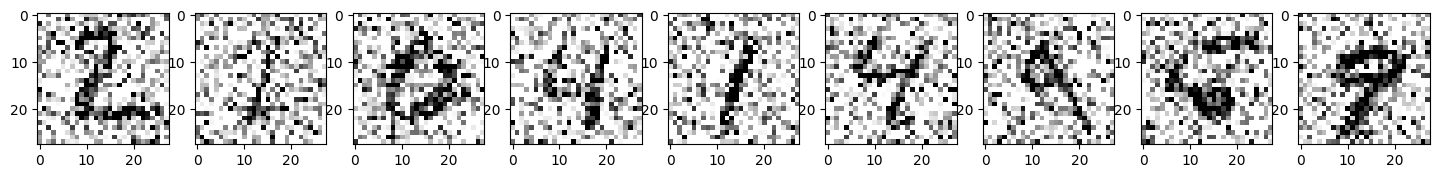

In [9]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

# Defining the Autoencoder!

In [10]:
model = Sequential()
#32 is the number of filters!
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

## The Loss is the Mean squared Error!
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/Users/simoneboesso/Desktop/nuclei-segmentation/nuclei/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

model.evaluate(x_test_noisy, x_test)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - loss: 0.0705 - val_loss: 0.0427
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0404 - val_loss: 0.0349
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0339 - val_loss: 0.0305
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0303 - val_loss: 0.0289
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0286 - val_loss: 0.0272
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0275 - val_loss: 0.0265
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0267 - val_loss: 0.0258
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0261 - val_loss: 0.0252
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 0.0255 - val_loss: 0.0247
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0251 - val_loss: 0.0243
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0245


0.02438548393547535

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


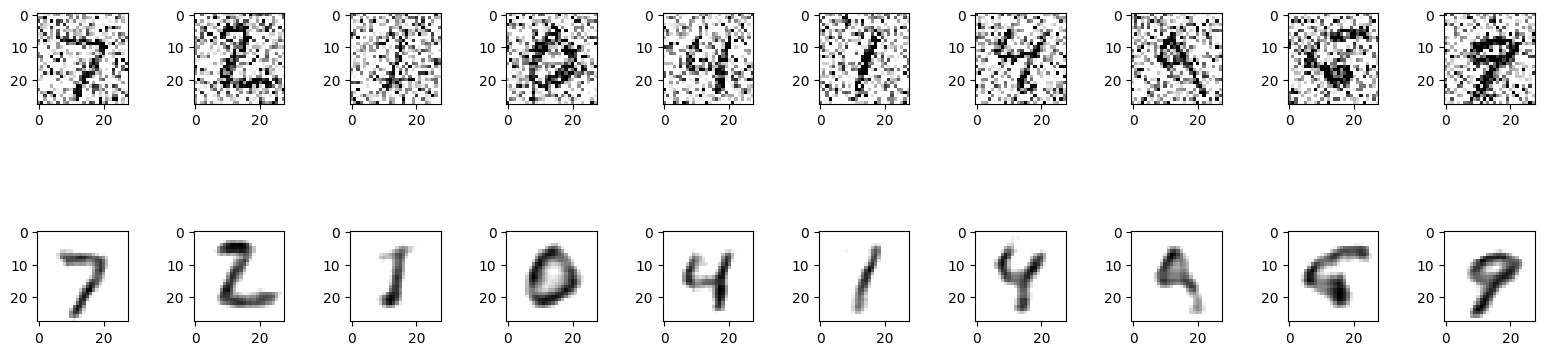

In [12]:
no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

# Let's do the same but with custom dataset!

https://www.kaggle.com/datasets/greatgamedota/ffhq-face-data-set

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Input
from tensorflow.keras.models import Sequential
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from tqdm import tqdm 
import tensorflow as tf
import cv2
import random

In [5]:
DIR_PATH = "../Face Images/"

all_paths = [os.path.join(DIR_PATH, name) for name in os.listdir(DIR_PATH) if name != '.DS_Store']

# Calcola il numero di percorsi da mantenere (40%)
num_paths_to_keep = int(len(all_paths) * 0.4)

# Seleziona casualmente i percorsi da mantenere
selected_paths = random.sample(all_paths, num_paths_to_keep)

# Rimuovi i percorsi non selezionati
for path in all_paths:
    if path not in selected_paths:
        os.remove(path)

In [6]:
DIR_PATH = "../Face Images/"
HEIGHT = 124
WIDTH = 124
CHANNELS = 3

In [7]:
name_images = [name for name in os.listdir(DIR_PATH) if name != '.DS_Store']
images = np.zeros((len(name_images),HEIGHT,WIDTH,CHANNELS),dtype=np.float32)

for n,name_image in tqdm(enumerate(name_images),total=len(name_images)):
    path_image = os.path.join(DIR_PATH, name_image)
    img = imread(path_image) 
    assert img.shape ==  (128,128,3) 
    resized_img = cv2.resize(img, (124, 124))
    images[n] = resized_img/255  

100%|██████████| 70000/70000 [01:43<00:00, 674.32it/s]


In [8]:
split_ratio = 0.8  
split_index = int(images.shape[0] * split_ratio)
X_train = images[:split_index]
X_test = images[split_index:]

In [9]:
def add_noise_and_clip(data, noise_factor=0.5):
    noisy_data = np.zeros_like(data)
    for i in tqdm(range(len(data)),total = len(data)):
        noisy_sample = data[i] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data[i].shape)
        noisy_data[i] = np.clip(noisy_sample, 0., 1.)
    return noisy_data

In [10]:
## Adding Gaussian Noise
X_train_noisy = add_noise_and_clip(X_train)
X_test_noisy = add_noise_and_clip(X_test) 

100%|██████████| 14000/14000 [00:25<00:00, 547.45it/s]


In [11]:
np.save("X_train_noisyFaces.npy", X_train_noisy)
np.save("X_test_noisyFaces.npy", X_test_noisy)

In [12]:
X_train_noisy  = np.load("X_train_noisyFaces.npy")
X_test_noisy  = np.load("X_test_noisyFaces.npy")

## Visualization Noisy Test images!

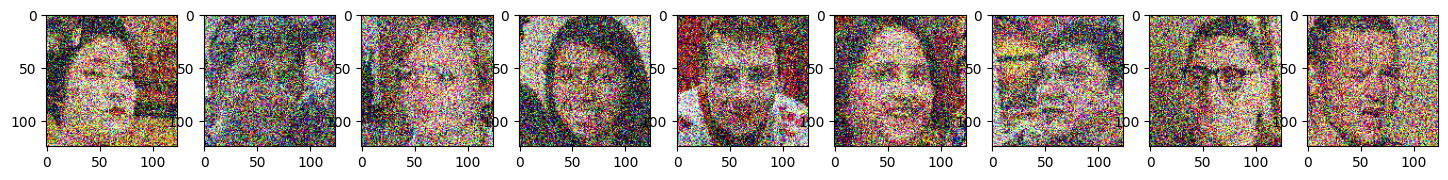

In [13]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(X_test_noisy[i])
plt.show()

In [29]:
model = Sequential()
#32 is the number of filters!
model.add(Input(shape=(HEIGHT, WIDTH, CHANNELS))),  # Adjust the shape according to your needs
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same')) # the resolution decrease when using MaxPool!
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same')) # This is the Bottleneck!

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2))) # # the resolution decrease when using MaxPool!
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

## The Loss is the Mean squared Error!
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 124, 124, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 62, 62, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 31, 31, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 62, 62, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 124, 124, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,163 (31.89 KB)

 Trainable params: 8,163 (31.89 KB)

 Non-trainable params: 0 (0.00 B)